In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [39]:
df=pd.read_excel("C:/Users/tusha/Downloads/1730285881-Airbnb_Open_Data.xlsx",low_memory=False)

TypeError: read_excel() got an unexpected keyword argument 'low_memory'

In [ ]:
import pandas as pd

# Correct way to read Excel
df = pd.read_excel("C:/Users/tusha/Downloads/1730285881-Airbnb_Open_Data.xlsx")


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [ ]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop 'house_rules' and 'license' columns if they exist
df.drop(columns=['house_rules', 'license'], errors='ignore', inplace=True)

# Remove dollar signs and commas from 'price' and 'service fee' columns
# Clean 'price' and 'service fee' columns
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str)  # Ensure values are strings
        df[col] = df[col].str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float

# Rename 'price' and 'service fee' columns to include a dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Convert data types
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = df['Construction year'].astype(int)

#Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
#Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)


In [ ]:
df.duplicated().value_counts()

False    83389
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [ ]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


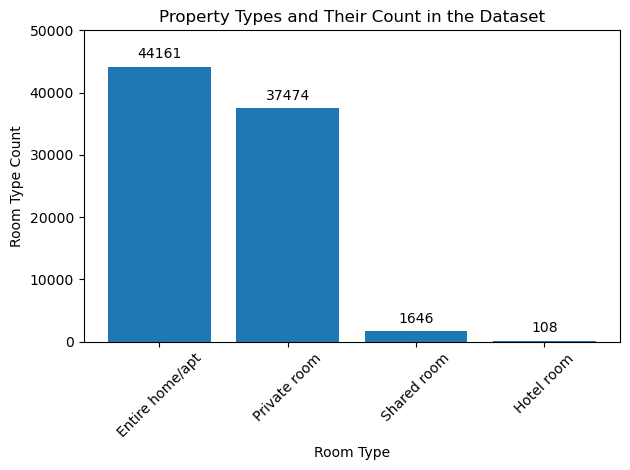

In [ ]:
# Room type count plotted on a bar chart
room_type_bar = plt.bar(property_types.index, property_types["count"])
plt.bar_label(room_type_bar, labels=property_types["count"], padding=4)
plt.ylim([0, 50000])
plt.xlabel('Room Type')  # Fixed typo: xlabe] → xlabel
plt.ylabel('Room Type Count')
plt.title('Property Types and Their Count in the Dataset')
plt.xticks(rotation=45)  # Optional: improves readability if labels are long
plt.tight_layout()       # Optional: avoids label cutoff
plt.show()


In [ ]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


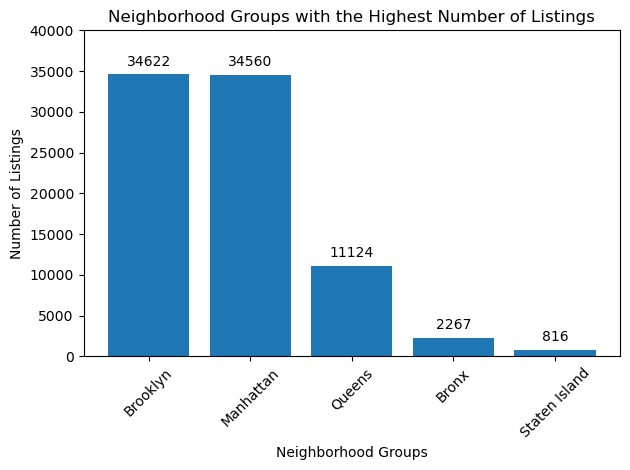

In [ ]:
hood_group_bar = plt.bar(hood_group.index, hood_group["count"])
plt.bar_label(hood_group_bar, labels=hood_group["count"], padding=4)
plt.ylim([0, 40000])
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Neighborhood Groups with the Highest Number of Listings')
plt.tight_layout()  # Optional: prevents label cutoff
plt.show()


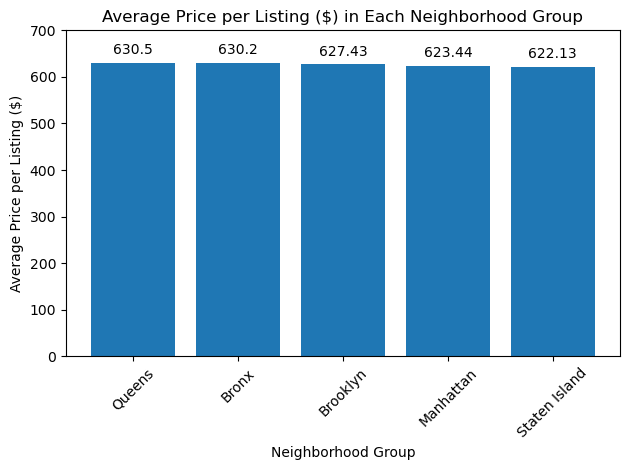

Queens has the highest average price: $630.50


In [ ]:
# Calculate average price per neighborhood group
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

# Plotting the bar chart
avg_price_bar = plt.bar(avg_price.index, avg_price['price_$'])
plt.bar_label(avg_price_bar, labels=avg_price['price_$'].round(2), label_type='edge', padding=4)
plt.ylim([0, 700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listing ($) in Each Neighborhood Group')
plt.tight_layout()
plt.show()
highest_avg_price_group = avg_price.index[0]
highest_avg_price_value = avg_price.iloc[0, 0]
print(f"{highest_avg_price_group} has the highest average price: ${highest_avg_price_value:.2f}")



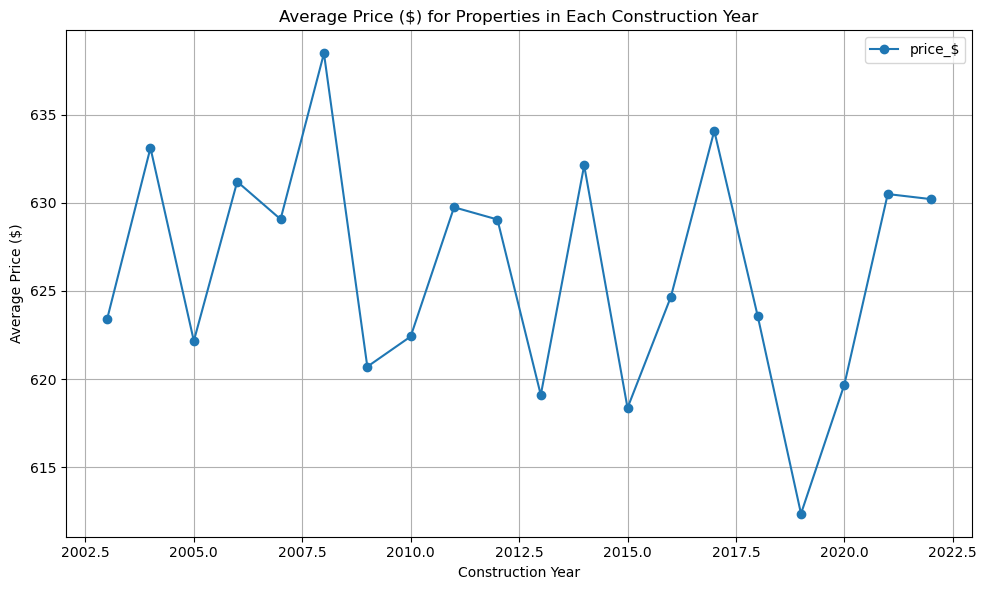

In [ ]:


# Group by construction year and calculate average price
avg_price_by_year = df.groupby('Construction year')['price_$'].mean().to_frame()

# Plot the result
avg_price_by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in Each Construction Year')
plt.grid(True)
plt.tight_layout()
plt.show()


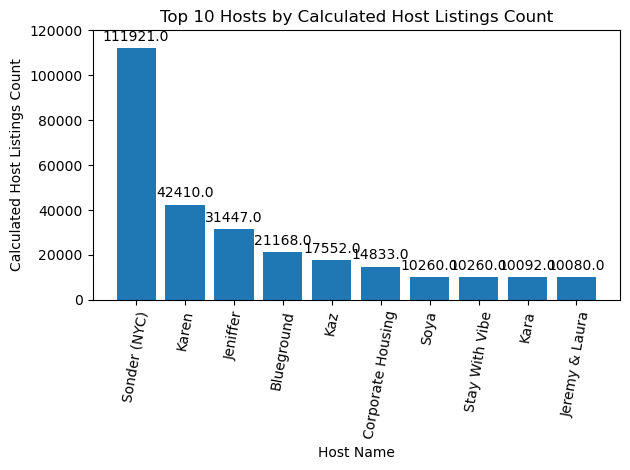

In [ ]:
# Top 10 hosts by calculated host listings count
hosts = (
    df.groupby('host name')['calculated host listings count']
    .sum()
    .sort_values(ascending=False)
    .nlargest(10)
    .to_frame()
)

# Plotting the bar chart
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'])
plt.bar_label(hosts_bar, labels=hosts['calculated host listings count'], label_type='edge', padding=3)
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.tight_layout()
plt.show()


In [ ]:
# Compare average review ratings between verified and unverified hosts
review = (
    df.groupby('host_identity_verified')['review rate number']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

print(review)


                        review rate number
host_identity_verified                    
verified                          3.284066
unconfirmed                       3.273325


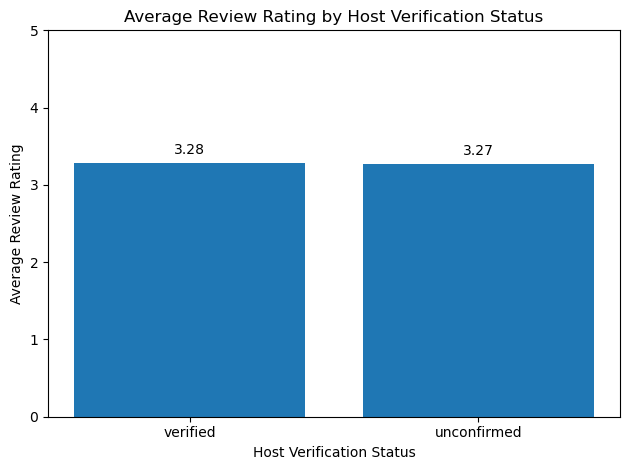

In [ ]:


# Bar chart for average review rate by host verification status
review_bar = plt.bar(review.index, review['review rate number'])
plt.bar_label(review_bar, labels=review['review rate number'].round(2), padding=4)
plt.ylim([0, 5])  # Adjusted to full review scale (0–5)
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rating')
plt.title('Average Review Rating by Host Verification Status')
plt.tight_layout()
plt.show()


In [ ]:
df['price_$'].corr(df['service_fee_$'])

0.9999909082976476

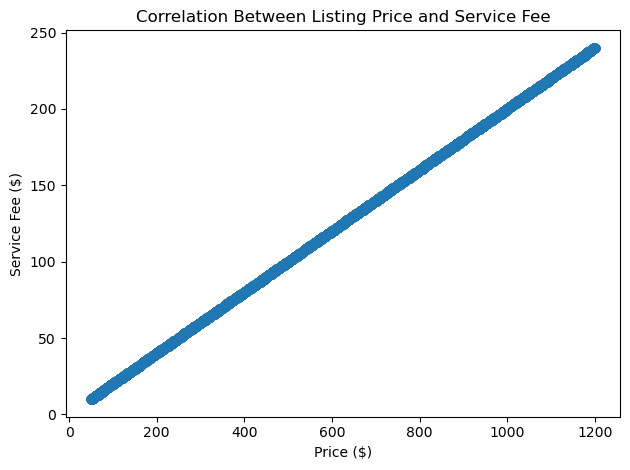

In [ ]:
# Regression plot showing correlation between price and service fee
sns.regplot(data=df, x='price_$', y='service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Correlation Between Listing Price and Service Fee')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate average review rating by neighborhood group and room type
ARRN = (
    df.groupby(['neighbourhood group', 'room type'])['review rate number']
    .mean()
    .round(2)
    .to_frame()
    .rename(columns={'review rate number': 'avg_review_rating'})
)

print(ARRN)


                                     avg_review_rating
neighbourhood group room type                         
Bronx               Entire home/apt               3.38
                    Private room                  3.31
                    Shared room                   3.36
Brooklyn            Entire home/apt               3.24
                    Hotel room                    3.83
                    Private room                  3.27
                    Shared room                   3.32
Manhattan           Entire home/apt               3.27
                    Hotel room                    3.50
                    Private room                  3.29
                    Shared room                   3.26
Queens              Entire home/apt               3.35
                    Hotel room                    3.75
                    Private room                  3.31
                    Shared room                   3.33
Staten Island       Entire home/apt               3.33
          

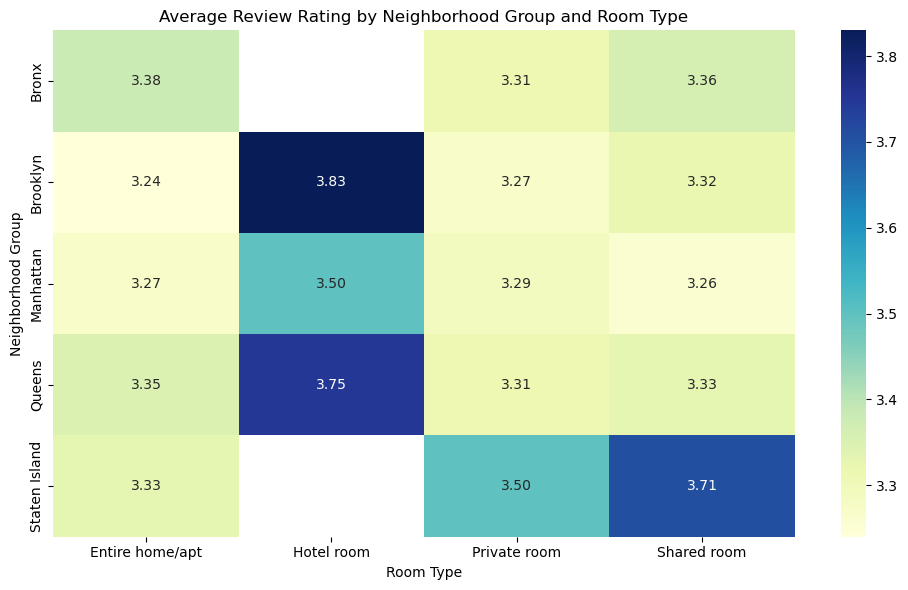

In [ ]:

# Pivot for heatmap
heatmap_data = ARRN.reset_index().pivot(index='neighbourhood group', columns='room type', values='avg_review_rating')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Review Rating by Neighborhood Group and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood Group')
plt.tight_layout()
plt.show()


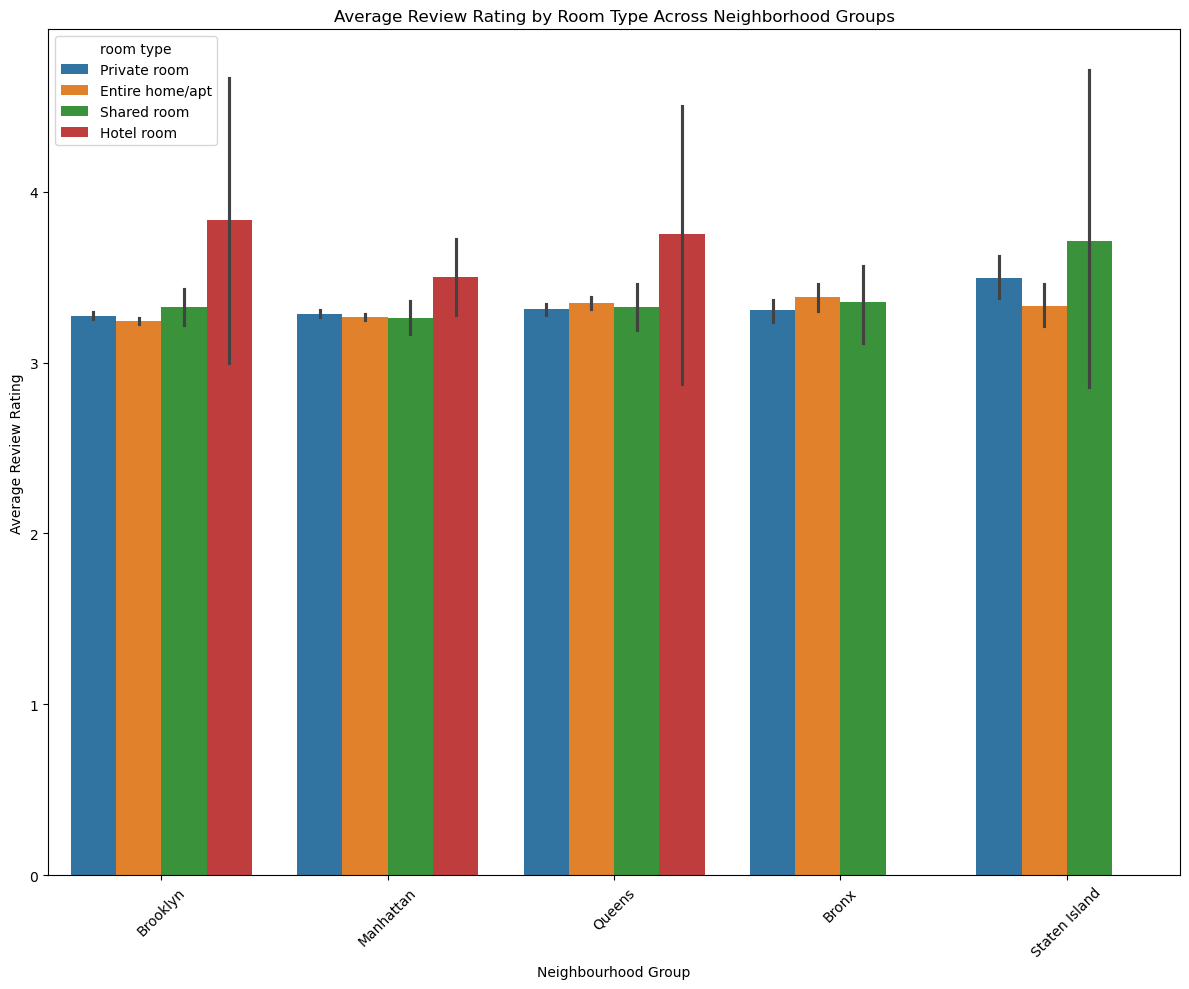

In [41]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rating')
plt.title('Average Review Rating by Room Type Across Neighborhood Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


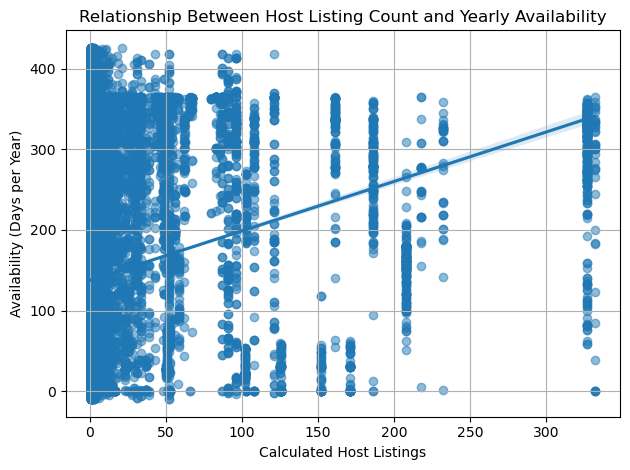

In [42]:
# Regression plot: host listing count vs availability
sns.regplot(data=df, x='calculated host listings count', y='availability 365', scatter_kws={'alpha':0.5})
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability (Days per Year)')
plt.title('Relationship Between Host Listing Count and Yearly Availability')
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
correlation = df['calculated host listings count'].corr(df['availability 365'])
print(f"Correlation: {correlation:.2f}")


Correlation: 0.14


In [44]:
df['calculated host listings count'].corr(df['availability 365'])

0.1359971471570338

## Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host behavior, and review patterns.

### Key Findings:
- **Entire home/apt listings** dominate the dataset in terms of count.
- **Listing counts vary significantly** across different neighborhood groups.
- There is a **downward trend between property construction year and price**, indicating older properties tend to be priced lower.
- **Verified host status** is positively associated with higher review ratings.
- A **strong correlation exists between listing price and service fee**, suggesting pricing strategies are tightly coupled with service charges.

### Future Directions:
- **Sentiment analysis** on guest reviews could reveal deeper insights into customer satisfaction and preferences, informing targeted marketing and product improvements.
- **Predictive modeling techniques**, such as regression or machine learning algorithms, could be employed to forecast:
  - Listing demand
  - Pricing trends
  - Customer behavior

These enhancements would support strategic decision-making for stakeholders in the short-term lodging industry.
